# Country Leaderboard in Wine Ratings

In [1]:
# import sqlalchemy
import sqlite3
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to SQLite database
connection = sqlite3.connect(r'../data/vivino.db')
# Create a cursor object
cursor = connection.cursor()

## Average wine rating by country

In [4]:
query_wine_ratings_by_country = """
    SELECT countries.code AS code, 
           countries.name AS country_name,  
           ROUND(AVG(wines.ratings_average), 2) AS rating,
           SUM(wines.ratings_count) as ratings_sum
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
    GROUP BY code
    ORDER BY ratings_sum DESC
    LIMIT 11
    ;
"""
df_wine_ratings_by_country = pd.read_sql_query(query_wine_ratings_by_country, connection)
print(df_wine_ratings_by_country.shape)
display(df_wine_ratings_by_country.head(17))
df_wine_ratings_by_country.to_csv("../data/csv/question_5_1.csv")

(11, 4)


,code,country_name,rating,ratings_sum
0,it,Italie,4.43,2135839
1,fr,France,4.45,2124809
2,us,États-Unis,4.49,834263
3,es,Espagne,4.44,746710
4,ar,Argentine,4.42,283673
5,cl,Chili,4.43,159256
6,pt,Portugal,4.44,62454
7,za,Afrique du Sud,4.46,59995
8,au,Australie,4.46,52138
9,hu,Hongrie,4.47,30564


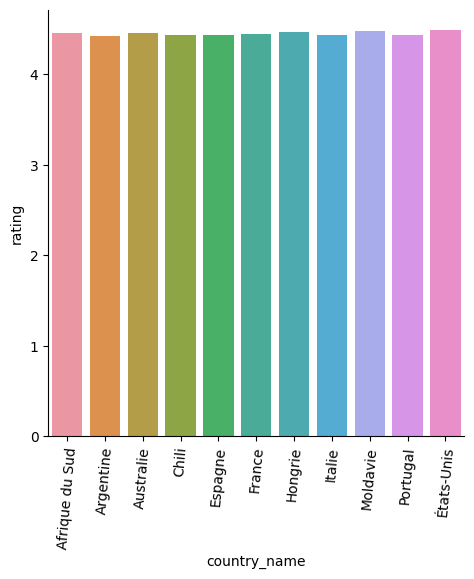

<Figure size 640x480 with 0 Axes>

In [5]:
df_wine_ratings_by_country = df_wine_ratings_by_country.sort_values("country_name")
g1 = sns.catplot(
	x = "country_name",
	y = "rating",
	data = df_wine_ratings_by_country,
	kind = "bar"
)
g1.tick_params(axis="x", rotation=85)
plt.show()
plt.clf()

## Average vintage rating by country

In [6]:
query_vintage_ratings_by_country = """
    SELECT countries.code AS code, 
           countries.name AS country_name,  
           ROUND(AVG(vintages.ratings_average), 2) AS rating,
           SUM(vintages.ratings_count) as ratings_sum
    FROM countries
        JOIN regions ON countries.code = regions.country_code
        JOIN wines ON regions.id = wines.region_id
        JOIN vintages ON wines.id = vintages.wine_id
    GROUP BY code
    ORDER BY ratings_sum DESC
    LIMIT 11
    ;
"""
df_vintage_ratings_by_country = pd.read_sql_query(query_vintage_ratings_by_country, connection)
print(df_vintage_ratings_by_country.shape)
display(df_vintage_ratings_by_country.head(17))
df_vintage_ratings_by_country.to_csv("../data/csv/question_5_2.csv")

(11, 4)


,code,country_name,rating,ratings_sum
0,it,Italie,3.63,467941
1,fr,France,3.07,405061
2,us,États-Unis,3.70,102332
3,es,Espagne,3.38,49032
4,ar,Argentine,4.32,16951
5,cl,Chili,4.12,14080
6,za,Afrique du Sud,3.66,5636
7,pt,Portugal,3.93,5532
8,md,Moldavie,3.87,4194
9,au,Australie,2.83,3804


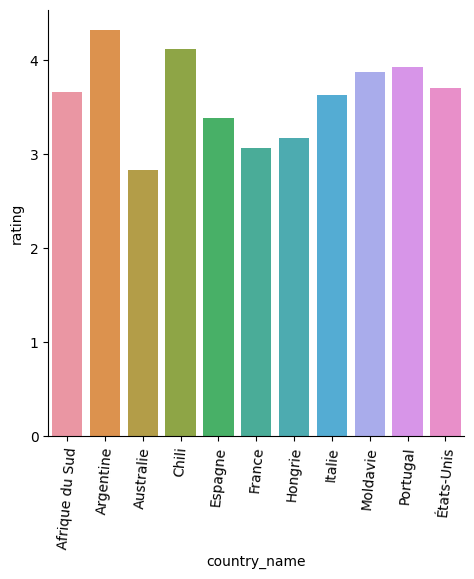

<Figure size 640x480 with 0 Axes>

In [7]:
df_vintage_ratings_by_country = df_vintage_ratings_by_country.sort_values("country_name")
g2 = sns.catplot(
	x = "country_name",
	y = "rating",
	data = df_vintage_ratings_by_country,
	kind = "bar"
)
g2.tick_params(axis="x", rotation=85)
plt.show()
plt.clf()

## Wine next to Vintage Ratings ordered by Country

In [8]:
df_wine_ratings_by_country["type"] = "Wine"
df_vintage_ratings_by_country["type"] = "Vintage"
df_ratings_by_country = pd.concat([df_wine_ratings_by_country, df_vintage_ratings_by_country])
display(df_ratings_by_country.shape)
#display(df_ratings_by_country.head(34))
df_ratings_by_country.to_csv("../data/csv/question_5_0.csv")

(22, 5)

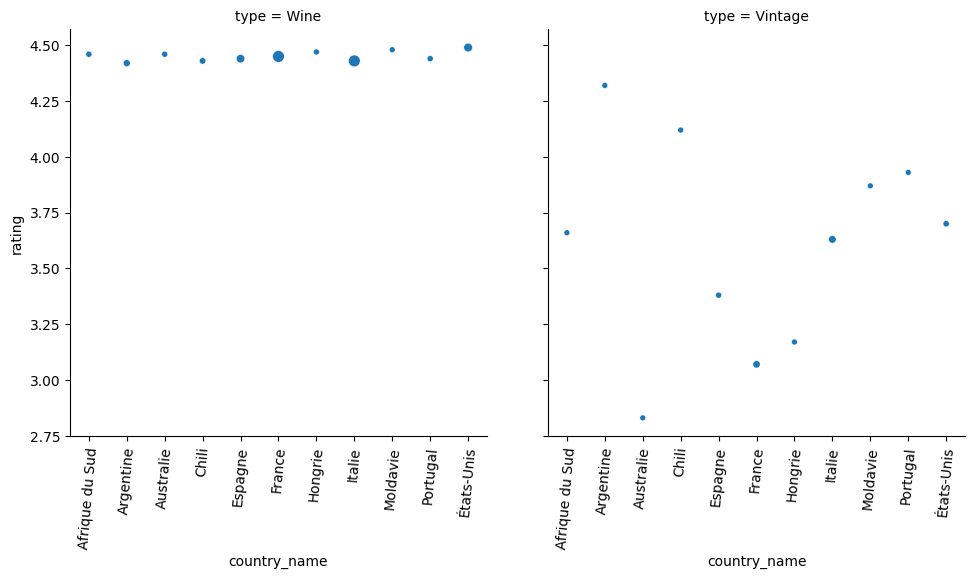

<Figure size 640x480 with 0 Axes>

In [9]:
g3 = sns.relplot(
    x = "country_name",
    y = "rating",
    data = df_ratings_by_country,
    col = "type",
    kind = "scatter",
    size = "ratings_sum",
    legend = False
)
g3.tick_params(axis="x", rotation=85)
plt.show()
plt.clf()